In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_main = pd.read_csv("data/main.csv", encoding='latin-1')
df_main.drop(df_main.index[-1], inplace=True)
df_main

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product


In [3]:
#df_main.dropna(inplace=True)
#df_main

In [4]:
df=df_main.copy()

In [5]:
# Let's investigate the imbalance of Null values correlating with neutral sentiment
df['device_recorded'] = np.where(df['emotion_in_tweet_is_directed_at'].notna(), 1, 0)
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,device_recorded
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,1
...,...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product,0
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,1
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,0
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0


In [6]:
df1 = df[['device_recorded', 'is_there_an_emotion_directed_at_a_brand_or_product']].copy()
df1

,device_recorded,is_there_an_emotion_directed_at_a_brand_or_product
0,1,Negative emotion
1,1,Positive emotion
2,1,Positive emotion
3,1,Negative emotion
4,1,Positive emotion
...,...,...
9087,0,No emotion toward brand or product
9088,1,Positive emotion
9089,0,No emotion toward brand or product
9090,0,No emotion toward brand or product


In [7]:
df1 = df1[df1['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]
df1['device_recorded'] = df1['device_recorded'].astype(str).replace({'0': 'no', '1': 'yes'})
df1 = df1.rename(columns={'device_recorded': 'device recorded'})
df1

<ipython-input-7-14ad95d9f366>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device_recorded'] = df1['device_recorded'].astype(str).replace({'0': 'no', '1': 'yes'})


,device recorded,is_there_an_emotion_directed_at_a_brand_or_product
0,yes,Negative emotion
1,yes,Positive emotion
2,yes,Positive emotion
3,yes,Negative emotion
4,yes,Positive emotion
...,...,...
9087,no,No emotion toward brand or product
9088,yes,Positive emotion
9089,no,No emotion toward brand or product
9090,no,No emotion toward brand or product


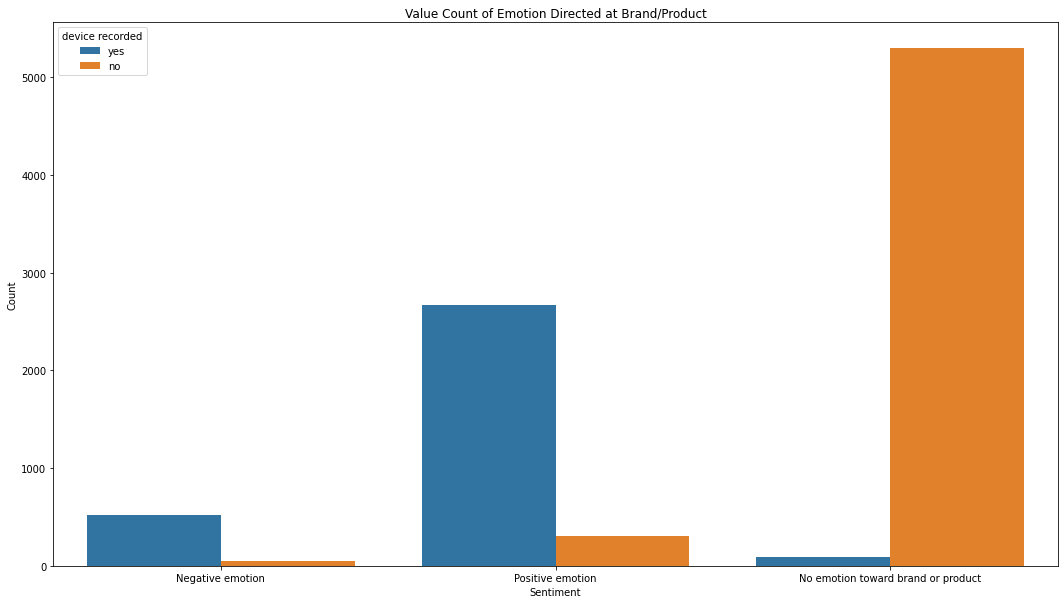

In [8]:
filtered_df = df1[df1['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

plt.figure(figsize=(18, 10))

sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', hue='device recorded', data=filtered_df)

plt.title("Value Count of Emotion Directed at Brand/Product")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

### It would appear that data that came Null was way more likely to be labeled as neutral.

### I made a class in the EDA/Prep that'll correctly fill this column from 33% to 100%

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [10]:
brands_clean = pd.read_csv("data/df_device_CLEAN.csv", encoding='latin-1')
brands_clean

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,brand_or_device,ipad,iphone,apple,google,android
0,wesley83 3g iphone 3 hrs tweeting riseaustin dead need upgrade plugin stations sxsw,negative emotion,iphone,0,1,0,0,0
1,jessedee know fludapp awesome ipad iphone app youll likely appreciate design also theyre giving free ts sxsw,positive emotion,"ipad, iphone",1,1,0,0,0
2,swonderlin wait ipad 2 also sale sxsw,positive emotion,ipad,1,0,0,0,0
3,sxsw hope years festival isnt crashy years iphone app sxsw,negative emotion,"ipad, iphone",1,1,0,0,0
4,sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech books conferences amp matt mullenweg wordpress,positive emotion,google,0,0,0,1,0
...,...,...,...,...,...,...,...,...
9087,mention yup dont third app yet im android suggestions sxsw cc mention,no emotion toward brand or product,android,0,0,0,0,1
9088,ipad everywhere sxsw link,positive emotion,ipad,1,0,0,0,0
9089,wave buzz rt mention interrupt regularly scheduled sxsw geek programming big news link google circles,no emotion toward brand or product,google,0,0,0,1,0
9090,googles zeiger physician never reported potential ae yet fda relies physicians quotwere operating w dataquot sxsw health2dev,no emotion toward brand or product,google,0,0,0,1,0


In [11]:
ipads_df = brands_clean[brands_clean['ipad'] == 1][['is_there_an_emotion_directed_at_a_brand_or_product', 'ipad']].copy().reset_index(drop=True)
iphones_df = brands_clean[brands_clean['iphone'] == 1][['is_there_an_emotion_directed_at_a_brand_or_product', 'iphone']].copy().reset_index(drop=True)
apple_df = brands_clean[brands_clean['apple'] == 1][['is_there_an_emotion_directed_at_a_brand_or_product', 'apple']].copy().reset_index(drop=True)
google_df = brands_clean[brands_clean['google'] == 1][['is_there_an_emotion_directed_at_a_brand_or_product', 'google']].copy().reset_index(drop=True)
android_df = brands_clean[brands_clean['android'] == 1][['is_there_an_emotion_directed_at_a_brand_or_product', 'android']].copy().reset_index(drop=True)

In [12]:
android_df

,is_there_an_emotion_directed_at_a_brand_or_product,android
0,positive emotion,1
1,positive emotion,1
2,positive emotion,1
3,positive emotion,1
4,positive emotion,1
...,...,...
575,no emotion toward brand or product,1
576,positive emotion,1
577,no emotion toward brand or product,1
578,no emotion toward brand or product,1


In [13]:
# This function will filter a dataframe so it only includes positive or negative sentiment tweets
def filter_dataframe(df):
    column_name = 'is_there_an_emotion_directed_at_a_brand_or_product'
    valid_values = ['positive', 'negative']

    df_copy = df.copy()
    df_copy[column_name] = df_copy[column_name].str.lower().str.replace('emotion', '').str.strip()
    df_copy = df_copy[df_copy[column_name].isin(valid_values)]
    df_copy.reset_index(drop=True, inplace=True)

    # Ensure column type is string
    df_copy[column_name] = df_copy[column_name].astype(str)

    return df_copy


In [14]:
filtered_apple_df = filter_dataframe(apple_df)
filtered_apple_df

,is_there_an_emotion_directed_at_a_brand_or_product,apple
0,positive,1
1,positive,1
2,positive,1
3,positive,1
4,positive,1
...,...,...
961,positive,1
962,positive,1
963,positive,1
964,positive,1


In [15]:
filtered_ipad_df = filter_dataframe(ipads_df)
filtered_ipad_df

,is_there_an_emotion_directed_at_a_brand_or_product,ipad
0,positive,1
1,positive,1
2,negative,1
3,positive,1
4,positive,1
...,...,...
1689,positive,1
1690,positive,1
1691,positive,1
1692,positive,1


In [16]:
filtered_iphone_df = filter_dataframe(iphones_df)
filtered_iphone_df

,is_there_an_emotion_directed_at_a_brand_or_product,iphone
0,negative,1
1,positive,1
2,negative,1
3,positive,1
4,positive,1
...,...,...
864,positive,1
865,positive,1
866,positive,1
867,positive,1


In [17]:
filtered_google_df = filter_dataframe(google_df)
filtered_google_df

,is_there_an_emotion_directed_at_a_brand_or_product,google
0,positive,1
1,positive,1
2,positive,1
3,positive,1
4,negative,1
...,...,...
821,positive,1
822,positive,1
823,positive,1
824,positive,1


In [18]:
filtered_android_df = filter_dataframe(android_df)
filtered_android_df

,is_there_an_emotion_directed_at_a_brand_or_product,android
0,positive,1
1,positive,1
2,positive,1
3,positive,1
4,positive,1
...,...,...
221,positive,1
222,positive,1
223,positive,1
224,positive,1


In [19]:
# Let's make a function to calculate the percentage of positive and negative tweets
def add_emotion_percentage_columns(df):
    # Ensure that the column 'is_there_an_emotion_directed_at_a_brand_or_product' exists in the DataFrame
    assert 'is_there_an_emotion_directed_at_a_brand_or_product' in df.columns, "The specified column does not exist in the DataFrame."

    # Count the number of 'positive' and 'negative' entries
    emotion_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

    # Calculate the percentages
    total = df['is_there_an_emotion_directed_at_a_brand_or_product'].count()
    positive_percentage = (emotion_counts.get('positive', 0) / total) * 100
    negative_percentage = (emotion_counts.get('negative', 0) / total) * 100

    # Create new DataFrame columns for the percentages
    df['positive'] = positive_percentage
    df['negative'] = negative_percentage

    return df

In [20]:
filtered_google_df = add_emotion_percentage_columns(filtered_google_df)
filtered_google_df

,is_there_an_emotion_directed_at_a_brand_or_product,google,positive,negative
0,positive,1,83.656174,16.343826
1,positive,1,83.656174,16.343826
2,positive,1,83.656174,16.343826
3,positive,1,83.656174,16.343826
4,negative,1,83.656174,16.343826
...,...,...,...,...
821,positive,1,83.656174,16.343826
822,positive,1,83.656174,16.343826
823,positive,1,83.656174,16.343826
824,positive,1,83.656174,16.343826


In [21]:
filtered_iphone_df = add_emotion_percentage_columns(filtered_iphone_df)
filtered_iphone_df

,is_there_an_emotion_directed_at_a_brand_or_product,iphone,positive,negative
0,negative,1,78.365938,21.634062
1,positive,1,78.365938,21.634062
2,negative,1,78.365938,21.634062
3,positive,1,78.365938,21.634062
4,positive,1,78.365938,21.634062
...,...,...,...,...
864,positive,1,78.365938,21.634062
865,positive,1,78.365938,21.634062
866,positive,1,78.365938,21.634062
867,positive,1,78.365938,21.634062


In [22]:
filtered_ipad_df = add_emotion_percentage_columns(filtered_ipad_df)
filtered_ipad_df

,is_there_an_emotion_directed_at_a_brand_or_product,ipad,positive,negative
0,positive,1,86.717828,13.282172
1,positive,1,86.717828,13.282172
2,negative,1,86.717828,13.282172
3,positive,1,86.717828,13.282172
4,positive,1,86.717828,13.282172
...,...,...,...,...
1689,positive,1,86.717828,13.282172
1690,positive,1,86.717828,13.282172
1691,positive,1,86.717828,13.282172
1692,positive,1,86.717828,13.282172


In [23]:
filtered_apple_df = add_emotion_percentage_columns(filtered_apple_df)
filtered_apple_df

,is_there_an_emotion_directed_at_a_brand_or_product,apple,positive,negative
0,positive,1,87.991718,12.008282
1,positive,1,87.991718,12.008282
2,positive,1,87.991718,12.008282
3,positive,1,87.991718,12.008282
4,positive,1,87.991718,12.008282
...,...,...,...,...
961,positive,1,87.991718,12.008282
962,positive,1,87.991718,12.008282
963,positive,1,87.991718,12.008282
964,positive,1,87.991718,12.008282


In [24]:
filtered_android_df = add_emotion_percentage_columns(filtered_android_df)
filtered_android_df

,is_there_an_emotion_directed_at_a_brand_or_product,android,positive,negative
0,positive,1,88.938053,11.061947
1,positive,1,88.938053,11.061947
2,positive,1,88.938053,11.061947
3,positive,1,88.938053,11.061947
4,positive,1,88.938053,11.061947
...,...,...,...,...
221,positive,1,88.938053,11.061947
222,positive,1,88.938053,11.061947
223,positive,1,88.938053,11.061947
224,positive,1,88.938053,11.061947


In [25]:
# Now, let's make a function to plot the percentages of positive and negative feedback, per listed brand/device
def plot_emotion_percentages(df):
    # Ensure that the column 'is_there_an_emotion_directed_at_a_brand_or_product' exists in the DataFrame
    assert 'is_there_an_emotion_directed_at_a_brand_or_product' in df.columns, "The specified column does not exist in the DataFrame."

    # Count the number of 'positive' and 'negative' entries
    emotion_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

    # Calculate the percentages
    total = df['is_there_an_emotion_directed_at_a_brand_or_product'].count()
    positive_percentage = (emotion_counts.get('positive', 0) / total) * 100
    negative_percentage = (emotion_counts.get('negative', 0) / total) * 100

    # Create a DataFrame suitable for plotting
    plot_df = pd.DataFrame({
        'Emotion': ['Positive', 'Negative'],
        'Percentage': [positive_percentage, negative_percentage]
    })

    # Plot
    plt.figure(figsize=(5, 6))
    ax = sns.barplot(x='Emotion', y='Percentage', data=plot_df, palette=["green", "red"])
    plt.title('Percentage of Positive and Negative Emotions')

    # Add percentage text to the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.9,
                '{:1.2f}%'.format(height), ha="center",
                fontsize=14, weight='bold', color='blue')

    plt.show()

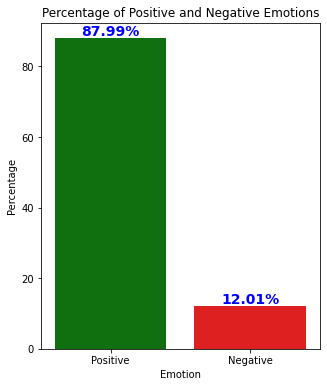

In [26]:
plot_emotion_percentages(filtered_apple_df)

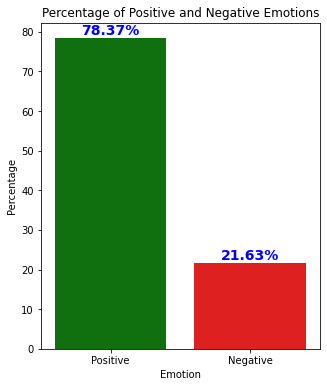

In [27]:
plot_emotion_percentages(filtered_iphone_df)

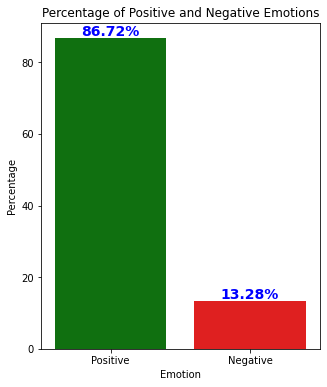

In [28]:
plot_emotion_percentages(filtered_ipad_df)

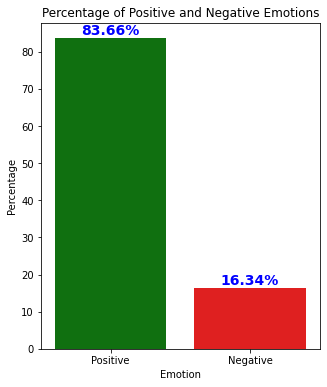

In [29]:
plot_emotion_percentages(filtered_google_df)

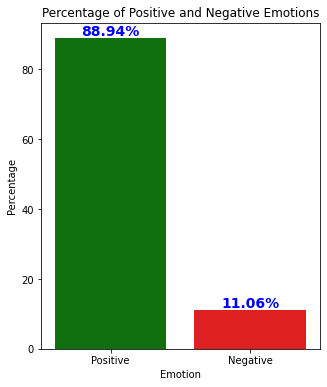

In [30]:
plot_emotion_percentages(filtered_android_df)